In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lightgbm
import sklearn


In [3]:
TRAIN = pd.read_csv('Train.csv')


In [4]:
TEST = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission.csv')

In [5]:
TEST

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,ID_1D68PV28,1975,Graduation,Married,80934.0,0,1,12-08-2012,70,5,...,29,80,11,6,0,0,0,0,0,0
668,ID_TM6CYFZO,1955,Graduation,Divorced,84052.8,0,1,18-02-2013,53,4,...,153,14,14,5,0,0,0,0,0,0
669,ID_VHR666SC,1952,PhD,Married,63974.4,0,0,09-08-2013,39,1,...,0,0,25,7,0,0,0,0,0,0
670,ID_O852YAO1,1960,Graduation,Together,69548.4,0,1,19-08-2013,31,7,...,77,5,29,3,0,0,0,0,0,1


In [6]:
TRAIN

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,ID_XWINUFGG,1970,Graduation,Married,52893.6,1,1,19-06-2014,24,2,...,0,4,5,0,0,0,0,0,0,0
1564,ID_GLVIHZLR,1980,Graduation,Single,74190.0,0,1,07-08-2013,63,1,...,30,27,4,0,0,0,0,0,0,0
1565,ID_O11VSIJY,1952,Master,Married,80857.2,0,1,15-01-2013,74,4,...,0,70,7,0,1,0,0,0,0,0
1566,ID_VS37P6MS,1964,PhD,Single,58701.6,1,1,12-04-2014,28,2,...,0,1,4,0,0,0,0,0,0,0


In [7]:
TRAIN.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [8]:
TEST.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [10]:
TRAIN['Disposable_Income'].fillna(TRAIN['Disposable_Income'].mean(), inplace = True)

In [11]:

TEST['Disposable_Income'].fillna(TEST['Disposable_Income'].mean(), inplace = True)

In [12]:
TRAIN.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [13]:
TEST.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [14]:

TRAIN.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [15]:
train_copy = TRAIN


In [16]:
TRAIN = TRAIN.drop('ID', axis= 1)

In [17]:
TEST = TEST.drop('ID', axis= 1)

In [18]:
TRAIN = TRAIN.drop('Date_Customer', axis= 1)

In [19]:
TEST = TEST.drop('Date_Customer', axis= 1)

In [20]:

from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [21]:
TRAIN['Marital_Status'] = encoder.fit_transform(TRAIN['Marital_Status'], TRAIN['Response'])

In [22]:
TRAIN['Education_Level'].value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

In [31]:
import category_encoders as ce
encoder = ce.OrdinalEncoder( mapping ={'col':'Education_Level',
 'mapping':{'Basic':0, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4 }})                                                                                  }])

SyntaxError: invalid syntax (<ipython-input-31-90b30bf3e708>, line 3)

In [30]:
add_columns1=pd.get_dummies(TEST['Marital_Status'])

In [ ]:
add_columns2=pd.get_dummies(TRAIN['Education_Level'])

In [ ]:
add_columns3=pd.get_dummies(TEST['Education_Level'])

In [ ]:
TRAIN.join(add_columns)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,Graduation,Married,52893.6,1,1,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1564,1980,Graduation,Single,74190.0,0,1,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1565,1952,Master,Married,80857.2,0,1,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1566,1964,PhD,Single,58701.6,1,1,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
TRAIN.join(add_columns2)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response,2n Cycle,Basic,Graduation,Master,PhD
0,1955,Graduation,Divorced,77504.4,1,1,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0,0,0,1,0,0
1,1958,Graduation,Together,56784.0,0,1,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0,0,0,1,0,0
2,1962,Graduation,Single,103714.8,0,0,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1,0,0,1,0,0
3,1979,2n Cycle,Single,46311.6,1,0,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0,1,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970,Graduation,Married,52893.6,1,1,24,2,2,0,3,29,4,10,2,0,4,5,0,0,0,0,0,0,0,0,0,1,0,0
1564,1980,Graduation,Single,74190.0,0,1,63,1,4,2,8,167,53,100,55,30,27,4,0,0,0,0,0,0,0,0,0,1,0,0
1565,1952,Master,Married,80857.2,0,1,74,4,2,2,9,820,11,53,11,0,70,7,0,1,0,0,0,0,0,0,0,0,1,0
1566,1964,PhD,Single,58701.6,1,1,28,2,1,0,4,57,3,9,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
TRAIN =  TRAIN.drop('Education_Level', axis= 1)

In [ ]:
TEST.join(add_columns1)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Absurd,Divorced,Married,Single,Together,Widow
0,1954,Graduation,Single,48556.8,0,1,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0,0,0,0,1,0,0
1,1961,Graduation,Widow,57499.2,0,1,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0,0,0,0,0,0,1
2,1973,Basic,Married,17025.6,0,0,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0,0,0,1,0,0,0
3,1970,Graduation,Together,91983.6,0,0,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0,0,0,0,0,1,0
4,1959,Graduation,Together,78235.2,0,2,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1975,Graduation,Married,80934.0,0,1,70,5,9,6,12,762,83,217,29,80,11,6,0,0,0,0,0,0,0,0,1,0,0,0
668,1955,Graduation,Divorced,84052.8,0,1,53,4,7,10,5,1078,3,250,153,14,14,5,0,0,0,0,0,0,0,1,0,0,0,0
669,1952,PhD,Married,63974.4,0,0,39,1,5,1,5,246,3,12,0,0,25,7,0,0,0,0,0,0,0,0,1,0,0,0
670,1960,Graduation,Together,69548.4,0,1,31,7,4,6,8,295,62,177,77,5,29,3,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
TEST.join(add_columns3)

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,2n Cycle,Basic,Graduation,Master,PhD
0,1954,Graduation,Single,48556.8,0,1,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0,0,0,1,0,0
1,1961,Graduation,Widow,57499.2,0,1,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0,0,0,1,0,0
2,1973,Basic,Married,17025.6,0,0,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0,0,1,0,0,0
3,1970,Graduation,Together,91983.6,0,0,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0,0,0,1,0,0
4,1959,Graduation,Together,78235.2,0,2,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1975,Graduation,Married,80934.0,0,1,70,5,9,6,12,762,83,217,29,80,11,6,0,0,0,0,0,0,0,0,1,0,0
668,1955,Graduation,Divorced,84052.8,0,1,53,4,7,10,5,1078,3,250,153,14,14,5,0,0,0,0,0,0,0,0,1,0,0
669,1952,PhD,Married,63974.4,0,0,39,1,5,1,5,246,3,12,0,0,25,7,0,0,0,0,0,0,0,0,0,0,1
670,1960,Graduation,Together,69548.4,0,1,31,7,4,6,8,295,62,177,77,5,29,3,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
TEST =  TEST.drop('Education_Level', axis= 1)

In [ ]:
xTEST=TRAIN =  TEST.drop('Marital_Status', axis= 1)

In [ ]:
xTEST

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,48556.8,0,1,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,1961,57499.2,0,1,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,1973,17025.6,0,0,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,1970,91983.6,0,0,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,1959,78235.2,0,2,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,1975,80934.0,0,1,70,5,9,6,12,762,83,217,29,80,11,6,0,0,0,0,0,0
668,1955,84052.8,0,1,53,4,7,10,5,1078,3,250,153,14,14,5,0,0,0,0,0,0
669,1952,63974.4,0,0,39,1,5,1,5,246,3,12,0,0,25,7,0,0,0,0,0,0
670,1960,69548.4,0,1,31,7,4,6,8,295,62,177,77,5,29,3,0,0,0,0,0,1


In [ ]:
X = TRAIN.drop('Response', axis= 1)

KeyError: ignored

In [ ]:
X = TRAIN.drop('Marital_Status', axis= 1)

In [ ]:
X

In [ ]:
y = TRAIN['Response']

In [ ]:
import imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


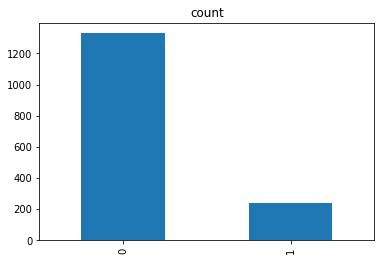

In [ ]:
y.value_counts().plot(kind='bar', title ='count')

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio = 'auto')
X_smt , y_smt = smt.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_w = scaler.fit_transform(X_smt)

In [ ]:
X_w


array([[-1.33094475,  0.33275465,  1.20613536, ..., -0.19644404,
        -0.08402809, -1.        ],
       [-1.07143143, -0.34573095, -0.79574524, ..., -0.19644404,
        -0.08402809, -1.        ],
       [-0.72541367,  1.19100927, -0.79574524, ..., -0.19644404,
        -0.08402809,  1.        ],
       ...,
       [ 0.70945504,  0.54183141, -0.79574524, ..., -0.19644404,
        -0.08402809,  1.        ],
       [-1.2495721 , -0.25156435, -0.67698567, ..., -0.19644404,
        -0.08402809,  1.        ],
       [-0.7077038 ,  0.24976366,  0.33354936, ...,  2.76588744,
        -0.08402809,  1.        ]])

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

ModuleNotFoundError: ignored

In [ ]:
estimators = [('rf', LGBMClassifier() ), (CatBoostClassifier(n_estimators=100, max_depth=3)),
('gbc', GradientBoostingClassifier(random_state=10))]

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator =RandomForestClassifier(n_estimators =10, random_state = 42))
lgb =LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4)
n_HP_points_to_test = 100

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_w, y_smt,  random_state=42)
gs.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
y_pred = gs.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
xtest = scaler.fit_transform(Xtest)

In [ ]:
prediction = gs.predict(xTEST)

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
sample['Response'] = prediction
sample.to_csv('Submission5.csv' , index = False)

In [ ]:
f1_score(y_test, prediction)